# Make plots

In [31]:
import glob
import os
import gpxpy
import random

import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

DATA_DIR = "/Users/arbatov/gitRepo/gpx-data/data/strava"

gpx_files = glob.glob(os.path.join(DATA_DIR,"*.gpx"))
sampled_gpx_files = random.sample(gpx_files, 6)

file_contents = []
for gpx_file in sampled_gpx_files:
    with open(gpx_file) as file:
        gpx = gpxpy.parse(file)
        
        gpx_points = gpx.tracks[0].segments[0].points
        for point in gpx_points:
            file_contents.append([
                os.path.basename(gpx_file),
                gpx.tracks[0].type,
                point.time,
                point.longitude, 
                point.latitude,   
                point.elevation
            ])

df = pd.DataFrame(
    file_contents, 
    columns=[
        'filename',
        'type',
        'time',
        'lon',
        'lat',
        'elev'
    ])

df.head()


,filename,type,time,lon,lat,elev
0,3307885998.gpx,Ride,2020-02-14 01:28:30+00:00,103.873690,1.300075,NaN
1,3307885998.gpx,Ride,2020-02-14 01:28:31+00:00,103.873659,1.300048,NaN
2,3307885998.gpx,Ride,2020-02-14 01:28:32+00:00,103.873669,1.300046,NaN
3,3307885998.gpx,Ride,2020-02-14 01:28:33+00:00,103.873669,1.300047,NaN
4,3307885998.gpx,Ride,2020-02-14 01:28:34+00:00,103.873649,1.300052,NaN


Let's make a basic plot

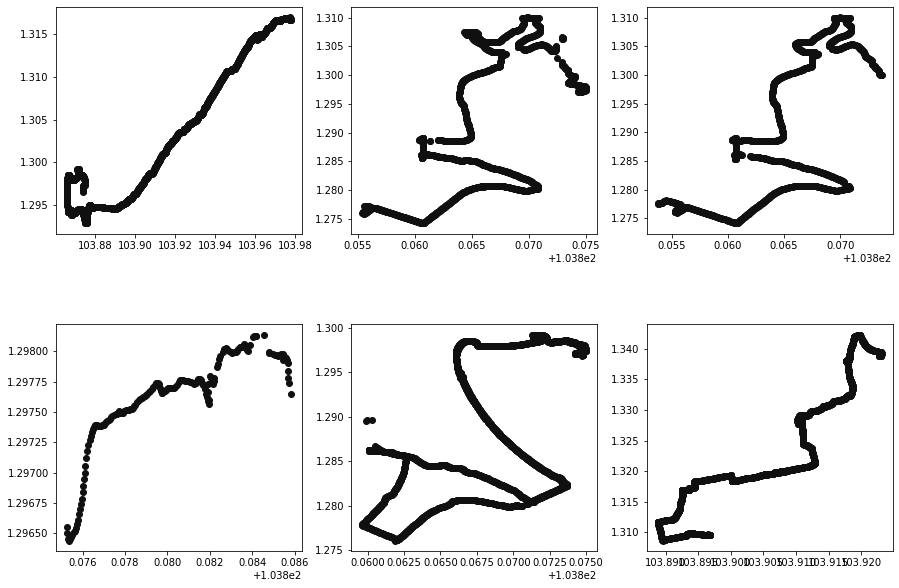

In [32]:
grouped = df.groupby('filename')
rowlength = int(grouped.ngroups/2)

fig, axs = plt.subplots(
    figsize=(15,10),                    
    nrows=2, 
    ncols=rowlength,
    gridspec_kw=dict(hspace=0.4)
) 

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    file_df = grouped.get_group(key)
    ax.scatter(file_df['lon'], file_df['lat'], color='#101010')

With the map

In [36]:
grouped = df.groupby('filename')
rowlength = int(grouped.ngroups/2)

fig = make_subplots(rows=2, cols=rowlength)

for i, key in enumerate(grouped.groups.keys(), start = 1):
    file_df = grouped.get_group(key)

    fig.add_trace(
        go.Scattermapbox(
            lat=file_df['lat'].tolist(),
            lon=file_df['lon'].tolist(),
            mode="lines",
            line=dict(width=3, color="#F00")
        ),
        row=1, col=i
    )

fig.update_layout(height=600, width=800)



ValueError: Trace type 'scattermapbox' is not compatible with subplot type 'xy'
at grid position (1, 1)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types